# Imputation par une valeur unique, pour des données générées

Question : Comment caractériser ici le mécanisme par lequel des données manquent : MCAR, MAR, MNAR ?

    MCAR car les données sont supprimées de manière aléatoire

data.shape =  (300, 2)


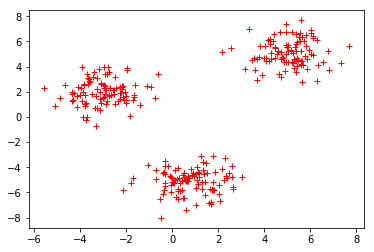

n_missing_samples = 90
missing_samples = [ True  True False False False  True  True False  True False False False
 False False False  True False False False  True False False False False
 False False False  True  True False  True False  True  True False False
 False False False False False  True False False False False False False
  True False False False  True  True  True False False  True False  True
 False  True False False False False  True False False False  True False
 False False False False  True  True False False False False False  True
 False  True False False  True False  True False False False False  True
 False False False False False False  True  True  True False  True  True
 False  True False False False False  True False  True  True False False
 False False False False False  True False False False False False False
  True False  True  True  True False  True False False False False False
  True  True  True  True False False False False False False False  True
 False Fal

18.045819056497987

In [56]:
# importations préalables
import numpy as np
from sklearn.preprocessing import Imputer

# générer l'échantillon
n_base = 100
data1 = np.random.randn(n_base,2) + [5,5]
data2 = np.random.randn(n_base,2) + [-3,2]
data3 = np.random.randn(n_base,2) + [1,-5]
data = np.concatenate((data1,data2,data3))
print("data.shape = ", data.shape)   # vérification

np.random.shuffle(data)
n_samples = data.shape[0]

# visualisation (optionnelle) des données générées
import matplotlib.pyplot as plt
plt.plot(data[:,0],data[:,1],'r+')
plt.show()

# taux de lignes à valeurs manquantes
missing_rate = 0.3
n_missing_samples = int(np.floor(n_samples * missing_rate))
print("n_missing_samples =", n_missing_samples)

# choix lignes à valeurs manquantes
missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                          dtype=np.bool),
                                 np.ones(n_missing_samples,
                                         dtype=np.bool)))
np.random.shuffle(missing_samples)
print("missing_samples =", missing_samples)

# obtenir la matrice avec données manquantes : manque indiqué par
#  valeurs NaN  dans la seconde colonne pour les lignes True dans
#   missing_samples
data_missing = data.copy()
data_missing[np.where(missing_samples), 1] = np.nan
print("data_missing", data_missing)

# imputation par la moyenne
imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data_imputed = imp.fit_transform(data_missing)
print("data_imputed", data_imputed)

# calculer l'"erreur" d'imputation
from sklearn.metrics import mean_squared_error
mean_squared_error(data[missing_samples,1],data_imputed[missing_samples,1])



Question : Affichez les valeurs calculées employées pour l’imputation
    
    On peut remarquer que c'est toujours la même valeur (la moyenne de l'échantillon des données présentes)

In [57]:
print(data_imputed[np.where(missing_samples), 1])

[[ 0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185  0.68461185  0.68461185  0.68461185
   0.68461185  0.68461185  0.68461185 

Question :Appliquez une imputation par la médiane et examinez l’erreur résultante.

    On constate que l'erreur est un peu plus forte. En effet, l'erreur correspond à (Xo - Xi)^2. La valeur de Xi minimisant cette valeur est la moyenne. Comme la médiane est différent de la moyenne, mais proche

In [58]:
# imputation par la médiane
imp_median = Imputer(missing_values=np.nan, strategy='median', axis=0)
data_imputed_median = imp_median.fit_transform(data_missing)

# calculer l'"erreur" d'imputation
from sklearn.metrics import mean_squared_error
print("Erreur en utilisant la moyenne = ", mean_squared_error(data[missing_samples,1],data_imputed[missing_samples,1]))
print("Erreur en utilisant la médiane = ", mean_squared_error(data[missing_samples,1],data_imputed_median[missing_samples,1]))

print("Moyenne =", np.mean(data))
print("Médiane =", np.median(data))

Erreur en utilisant la moyenne =  18.0458190565
Erreur en utilisant la médiane =  19.9315728637
Moyenne = 0.796565873643
Médiane = 1.4280801577


Question : Appliquez une imputation par 0 et examinez l’erreur résultante. Pourquoi est-elle supérieure à celle obtenue lors de l’imputation par la moyenne ou par la médiane ?

    L'erreur est plus grande car on augmente la variance de l'ensemble en ayant des données éloignées de la moyenne

In [59]:
# imputation par ZERO
data_imputed_0 = np.copy(data_missing)
data_imputed_0[np.where(missing_samples), 1] = 0
print(data_imputed_0[:20])

# calculer l'"erreur" d'imputation
from sklearn.metrics import mean_squared_error
print("Erreur en utilisant 0 = ", mean_squared_error(data[missing_samples,1],data_imputed_0[missing_samples,1]))


[[-0.34670057  0.        ]
 [ 3.44227291  0.        ]
 [ 1.10328607 -4.37065438]
 [ 5.59557269  5.23819894]
 [-3.85324527  2.57483005]
 [ 1.15125668  0.        ]
 [-3.85577303  0.        ]
 [ 1.06451778 -4.0086496 ]
 [ 2.39136008  0.        ]
 [-4.10418988  2.40294398]
 [ 2.4725054  -4.48242101]
 [-0.06804143 -5.41661974]
 [ 1.34586209 -3.6002911 ]
 [ 1.69330161 -6.73876334]
 [-2.26961739  1.86520808]
 [ 0.80287257  0.        ]
 [ 0.59240593 -7.42557825]
 [ 4.25458885  5.80578246]
 [-0.35707616 -5.8374626 ]
 [ 0.40113697  0.        ]]
Erreur en utilisant 0 =  18.4020693926


# Imputation par le centre du groupe, pour des données générées

Question : Que faudrait-il changer dans la génération des données pour que l’imputation par les centres fonctionne mieux que l’imputation par la moyenne ou la médiane ?

    Générer les valeurs selon une loi normale
    Augmenter la distance inter-groupe

In [60]:
# obtenir le tableau composé des seules observations complètes
data_filtered = data[~missing_samples, :]
print(data_filtered.shape)    # vérification

# application de la classification automatique aux observations complètes
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(data_filtered)
kmeans.cluster_centers_  # affichage des centres obtenus pour les groupes

# pour chaque observation incomplète, détermination du centre le plus proche
from sklearn.neighbors.nearest_centroid import NearestCentroid
y = np.array([1, 2, 3])
ncPredictor = NearestCentroid()
# les 'observations' pour NearestCentroid sont les centres mêmes
ncPredictor.fit(kmeans.cluster_centers_[:,0].reshape(-1, 1), y)
whichClust = ncPredictor.predict(data_missing[missing_samples, 0].reshape(-1,1))
# détermination des valeurs à utiliser pour l'imputation
estimated = np.zeros(n_missing_samples)
indices = range(n_missing_samples)
for i in indices:
  estimated[i] = kmeans.cluster_centers_[whichClust[i]-1,1]

data_imputed = data_missing.copy()   # initialisation de data_imputed
# imputation avec les valeurs obtenues
data_imputed[missing_samples, 1] = estimated
# calcul de l'erreur moyenne d'imputation
mean_squared_error(data[missing_samples,1],data_imputed[missing_samples,1])


(210, 2)


2.3374809420824114

# Imputation pour les données « textures »

Question : Projetez ces données sur les deux premiers axes principaux, choisissez aléatoirement 25% de valeurs manquantes sur l’ordonnée (les projections sur les deux premiers axes sont des vecteurs à 2 dimensions) et appliquez l’imputation par la moyenne et par la médiane.

    

(5500, 2)
[[-0.5021359   0.02231649]
 [ 0.26441333 -0.81787029]
 [-0.16764291 -0.55808389]
 ..., 
 [ 0.69664896 -1.12185591]
 [ 2.03950464  0.4970261 ]
 [-2.05149676  0.23271515]]
1375
NaN
[[-0.5021359          nan]
 [ 0.26441333         nan]
 [-0.16764291         nan]
 [-0.19027302         nan]
 [-2.14961179         nan]
 [-0.83728921         nan]
 [ 1.49923594         nan]
 [-2.09341752         nan]
 [-2.49168044         nan]
 [-0.71164872         nan]]
Others
[[ 0.69684069  0.05882417]
 [-2.64533449  0.18450706]
 [ 1.12558504 -0.03156605]
 [-0.1371567  -0.01352219]
 [-1.70140409  0.43747372]
 [ 0.80402531 -0.06056526]
 [ 0.32771086  0.20816855]
 [ 0.08792956  0.2558365 ]
 [-0.57163428 -0.27860122]
 [-2.37669326  0.10940426]]
Erreur en utilisant la moyenne =  0.203097057683
(5500, 2)
Erreur en utilisant la médiane =  0.20858895695
(5500, 2)


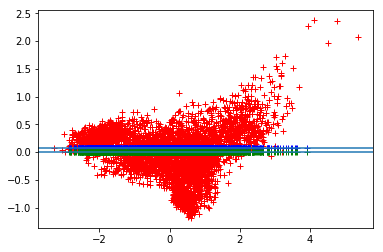

In [69]:
# lecture des données et aplication de l'ACP
from sklearn.decomposition import PCA
textures = np.loadtxt('texture.dat')
pca = PCA(n_components = 2).fit(textures[:,:40])
texturep = pca.transform(textures[:,:40])

np.random.shuffle(texturep)
print(texturep.shape)
n_samples_texturep = texturep.shape[0]

print(texturep[:,:10])

sep = int(n_samples_texturep * .25)
print(sep)
texturep_nan = np.copy(texturep)
texturep_nan[:sep, 1] = np.nan

print("NaN")
print(texturep_nan[:10, : ])
print("Others")
print(texturep_nan[sep:sep+10, : ])

# imputation par la moyenne
imp_texturep = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data_imputed_texturep = imp_texturep.fit_transform(texturep_nan)
print("Erreur en utilisant la moyenne = ", mean_squared_error(texturep[:sep,1],data_imputed_texturep[:sep,1]))
print(data_imputed_texturep.shape)

# imputation par la médiane
imp_median_texturep = Imputer(missing_values=np.nan, strategy='median', axis=0)
data_imputed_median_texturep = imp_median_texturep.fit_transform(texturep_nan)
print("Erreur en utilisant la médiane = ", mean_squared_error(texturep[:sep,1],data_imputed_median_texturep[:sep,1]))
print(data_imputed_median_texturep.shape)


fig, ax = plt.subplots()
ax.plot(texturep[sep:,0],texturep[sep:,1],'r+')
ax.plot(data_imputed_median_texturep[:sep,0],data_imputed_median_texturep[:sep,1],'b+')
ax.plot(data_imputed_texturep[:sep,0],data_imputed_texturep[:sep,1],'g+')
ax.axhline(y=np.mean(texturep[sep:,1]))
ax.axhline(y=np.median(texturep[sep:,1]))
plt.show()
